In [9]:
import os
print("Current working directory:", os.getcwd())
print(os.listdir('data/cred_score'))

Current working directory: /Users/lineesha/Documents/GitHub/LLM-Loan-Confidence-Prediction
['credit_score.md', 'cleaned_avg_credit_score_2020_fips_avg.csv', 'merged_fips_data_gpt-oss-120b.csv', 'merged_data_llama-3.1-8b-instant.csv', 'us_county_llm_estimates_gpt-oss-120b.csv', 'us_county_llm_estimates_llama-3.1-8b-instant.csv', 'merged_data_llama-3.3-70b-versatile.csv', 'us_county_llm_estimates_llama-3.3-70b-versatile.csv', 'differences_cs', 'us_county_llm_estimates_gpt-oss-20b.csv', 'merged_data_gpt-oss-20b.csv']


In [10]:
import pandas as pd

dti_data = pd.read_csv('data/debt_to_income/merged_data_dti_llama-3.3-70b-versatile.csv')
credit_score_data = pd.read_csv('data/cred_score/merged_data_llama-3.3-70b-versatile.csv')

print('read')

read


In [11]:
print("DTI:\n", dti_data.columns.tolist())
print("\nCredit score:\n", credit_score_data.columns.tolist())

DTI:
 ['county_fips', 'county', 'dti_ratio', 'loan_confidence', 'area_median_dti', 'error', 'year', 'qtr', 'area_fips', 'low', 'high', 'mean_col', 'Difference']

Credit score:
 ['county_fips', 'county', 'predicted_credit_score', 'loan_confidence', 'error', 'FIPS', 'credit_score', 'par_state', 'par_county', 'county_name', 'kid_race', 'Difference']


In [12]:
merged = pd.merge(
    dti_data,
    credit_score_data,
    left_on='county_fips',
    right_on='county_fips',
    how='inner'
)

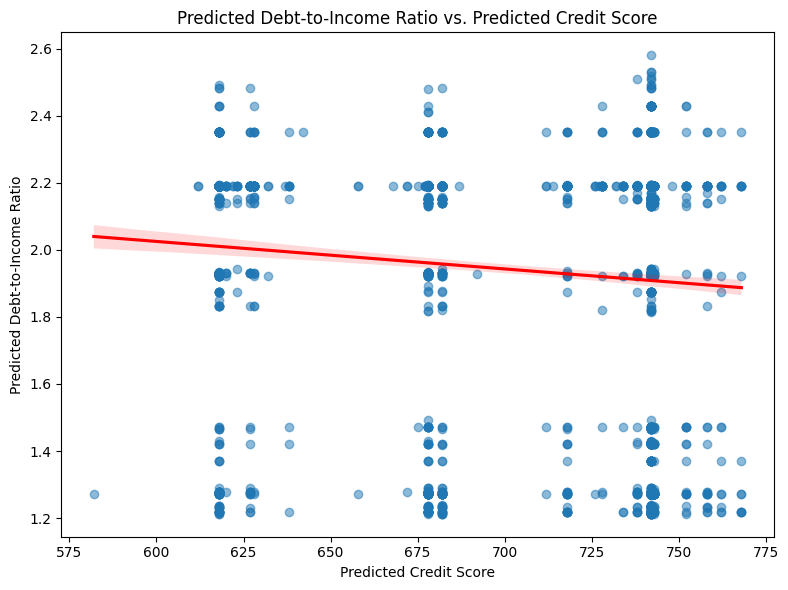

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(
    x="predicted_credit_score",
    y="dti_ratio",
    data=merged,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.title("Predicted Debt-to-Income Ratio vs. Predicted Credit Score")
plt.xlabel("Predicted Credit Score")
plt.ylabel("Predicted Debt-to-Income Ratio")
plt.tight_layout()
plt.show()

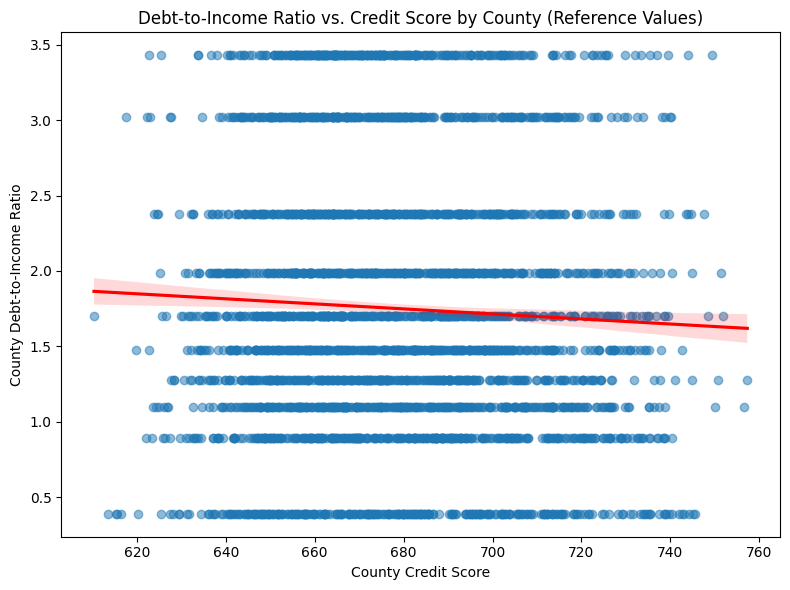

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(
    x="credit_score",
    y="mean_col",
    data=merged,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.title("Debt-to-Income Ratio vs. Credit Score by County (Reference Values)")
plt.xlabel("County Credit Score")
plt.ylabel("County Debt-to-Income Ratio")
plt.tight_layout()
plt.show()